<a href="https://colab.research.google.com/github/megmkoch/IceJamProjectFall2022/blob/main/dataDownloadStreamGages2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install geopandas
!pip install libpysal
!pip install rasterio
!pip install earthpy
!pip install rioxarray
!pip install rasterstats
!pip install climata

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 4.8 MB/s 
     |████████████████████████████████| 16.6 MB 108 kB/s 
     |████████████████████████████████| 7.8 MB 51.8 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.4 MB 6.7 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 20.9 MB 84.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 4.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 53 kB 1.4 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
    

In [2]:
import numpy as np
import numpy.ma as ma
import geopandas as gpd
import pandas as pd
from pandas.plotting import register_matplotlib_converters
from climata.usgs import DailyValueIO, InstantValueIO

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import rasterio as rio
from rasterio.plot import plotting_extent
import earthpy as et
import earthpy.plot as ep
import os
import rioxarray as rxr

In [3]:
register_matplotlib_converters()
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [4]:
# set parameters
nyears = 1
ndays = 365 * nyears
huc = "02020004"
station_ids = ["01354330", "01354500", "01355475", "01356000"]
param_id = "00065"

data = DailyValueIO(
    start_date="2019-02-07",
    end_date="2019-02-19",
    station= station_ids
)

date = []
value = []

for series in data:
    for row in series.data:
        date.append(row[0])
        value.append(row[1])

In [5]:
site_names = [[series.site_name] * len(series.data) for series in data]

# unroll the list of lists
flat_site_names = [item for sublist in site_names for item in sublist]

In [6]:
print(site_names)

[['MOHAWK RIVER AT LOCK 8 NEAR SCHENECTADY NY', 'MOHAWK RIVER AT LOCK 8 NEAR SCHENECTADY NY', 'MOHAWK RIVER AT LOCK 8 NEAR SCHENECTADY NY', 'MOHAWK RIVER AT LOCK 8 NEAR SCHENECTADY NY', 'MOHAWK RIVER AT LOCK 8 NEAR SCHENECTADY NY', 'MOHAWK RIVER AT LOCK 8 NEAR SCHENECTADY NY', 'MOHAWK RIVER AT LOCK 8 NEAR SCHENECTADY NY', 'MOHAWK RIVER AT LOCK 8 NEAR SCHENECTADY NY', 'MOHAWK RIVER AT LOCK 8 NEAR SCHENECTADY NY', 'MOHAWK RIVER AT LOCK 8 NEAR SCHENECTADY NY', 'MOHAWK RIVER AT LOCK 8 NEAR SCHENECTADY NY', 'MOHAWK RIVER AT LOCK 8 NEAR SCHENECTADY NY', 'MOHAWK RIVER AT LOCK 8 NEAR SCHENECTADY NY'], ["MOHAWK RIVER AT FREEMAN'S BRIDGE AT SCHENECTADY NY", "MOHAWK RIVER AT FREEMAN'S BRIDGE AT SCHENECTADY NY", "MOHAWK RIVER AT FREEMAN'S BRIDGE AT SCHENECTADY NY", "MOHAWK RIVER AT FREEMAN'S BRIDGE AT SCHENECTADY NY", "MOHAWK RIVER AT FREEMAN'S BRIDGE AT SCHENECTADY NY", "MOHAWK RIVER AT FREEMAN'S BRIDGE AT SCHENECTADY NY", "MOHAWK RIVER AT FREEMAN'S BRIDGE AT SCHENECTADY NY", "MOHAWK RIVER AT FRE

In [7]:
# bundle the data into a data frame
df = pd.DataFrame({'site': flat_site_names, 
                   'date': date, 
                   'value': value})

# remove missing values
df = df[df['value'] != -999999.0]

In [8]:
print(df)

                                                 site       date     value
0          MOHAWK RIVER AT LOCK 8 NEAR SCHENECTADY NY 2019-02-07     21.58
1          MOHAWK RIVER AT LOCK 8 NEAR SCHENECTADY NY 2019-02-08     23.65
2          MOHAWK RIVER AT LOCK 8 NEAR SCHENECTADY NY 2019-02-09     24.56
3          MOHAWK RIVER AT LOCK 8 NEAR SCHENECTADY NY 2019-02-10     21.44
4          MOHAWK RIVER AT LOCK 8 NEAR SCHENECTADY NY 2019-02-11     19.41
5          MOHAWK RIVER AT LOCK 8 NEAR SCHENECTADY NY 2019-02-12     17.79
6          MOHAWK RIVER AT LOCK 8 NEAR SCHENECTADY NY 2019-02-13     16.79
7          MOHAWK RIVER AT LOCK 8 NEAR SCHENECTADY NY 2019-02-14     16.84
8          MOHAWK RIVER AT LOCK 8 NEAR SCHENECTADY NY 2019-02-15     16.90
9          MOHAWK RIVER AT LOCK 8 NEAR SCHENECTADY NY 2019-02-16     16.88
10         MOHAWK RIVER AT LOCK 8 NEAR SCHENECTADY NY 2019-02-17     16.26
11         MOHAWK RIVER AT LOCK 8 NEAR SCHENECTADY NY 2019-02-18     15.95
12         MOHAWK RIVER A

In [10]:
lock8_vd_0219 = value[12] - value[0]
print(lock8_vd_0219)

-6.049999999999999


In [11]:
freemans_vd_0219 = value[25] - value[13]
print(freemans_vd_0219)

-13720.0


In [12]:
rexford_vd_0219 = value[38] - value[26]
print(rexford_vd_0219)

-3.8599999999999994


In [13]:
vischer_vd_0219 = value[51] - value[39]
print(vischer_vd_0219)

-1.6300000000000008


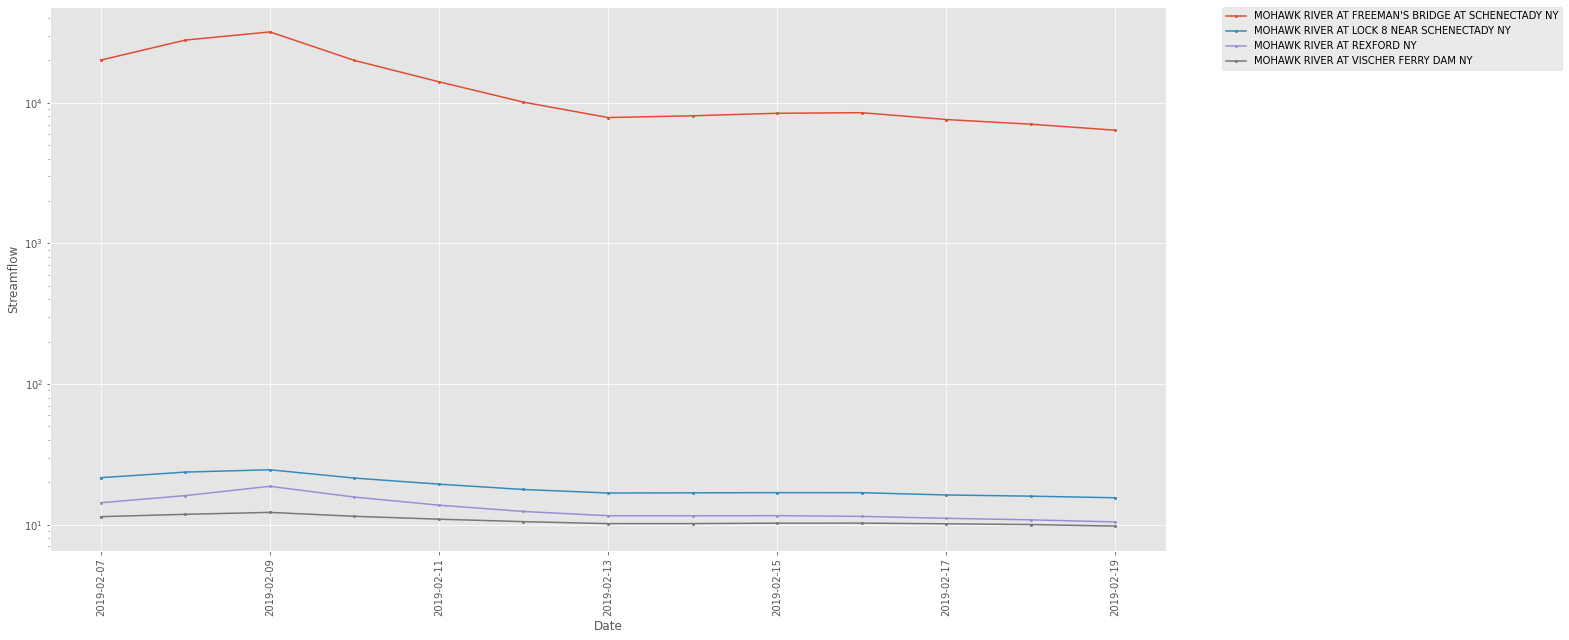

In [9]:
# visualize flow time series, coloring by site
groups = df.groupby('site')
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.date, group.value, marker='o', linestyle='-', ms=2, label=name)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Date')
plt.ylabel('Streamflow')
plt.xticks(rotation='vertical')
plt.yscale('log')
plt.show()

In [20]:
lock8_0207 = [-1.5500000000000007]
freemans_0207 = [-2100.0]
rexford_0207 = [-1.870000000000001]
vischer_0207 = [-0.15000000000000036]

In [24]:
lock8_0219 = [-6.049999999999999]
freemans_0219 = [-13720.0]
rexford_0219 = [-3.8599999999999994]
vischer_0219 = [-1.6300000000000008]

In [38]:
#convert stream gage measurements from ft3 to m3
lock8_0207_m = lock8_0207[0]*0.0283168
freemans_0207_m = freemans_0207[0]*0.0283168
rexford_0207_m = rexford_0207[0]*0.0283168
vischer_0207_m = vischer_0207[0]*0.0283168
lock8_0219_m = lock8_0219[0]*0.0283168
freemans_0219_m = freemans_0219[0]*0.0283168
rexford_0219_m = rexford_0219[0]*0.0283168
vischer_0219_m = vischer_0219[0]*0.0283168

In [39]:
start_date = ["2019-01-26", "2019-02-07"]
end_date = ["2019-02-07", "2019-02-19"]
lock8_vertdisp = [lock8_0207_m, lock8_0219_m]
rexford_vertdisp = [rexford_0207_m, rexford_0219_m]
freemans_vertdisp = [freemans_0207_m, freemans_0219_m]
vischer_vertdisp = [vischer_0207_m, vischer_0219_m]

In [40]:
streamgages_vertdisp = pd.DataFrame({'start_date':start_date, 'end_date':end_date, 'lock8_vertdisp':lock8_vertdisp, 'rexford_vertdisp':rexford_vertdisp, 'freemans_vertdisp':freemans_vertdisp, 'vischer_vertdisp':vischer_vertdisp})

In [41]:
print(streamgages_vertdisp)

   start_date    end_date  lock8_vertdisp  rexford_vertdisp  \
0  2019-01-26  2019-02-07       -0.043891         -0.052952   
1  2019-02-07  2019-02-19       -0.171317         -0.109303   

   freemans_vertdisp  vischer_vertdisp  
0         -59.465280         -0.004248  
1        -388.506496         -0.046156  
